In [ ]:
from helper import get_azure_openai_keys

AZURE_API_KEY, AZURE_ENDPOINT, AZURE_API_VERSION = get_azure_openai_keys()

In [ ]:
import nest_asyncio

nest_asyncio.apply()

In [ ]:
from helper import get_azure_llm, get_azure_embed_model

llm = get_azure_llm()
embed_model = get_azure_embed_model()

# query tools

In [ ]:
from utils import get_doc_tools

vector_tool, summary_tool = get_doc_tools("../data/metagpt.pdf", "metagpt")

# function calling agent

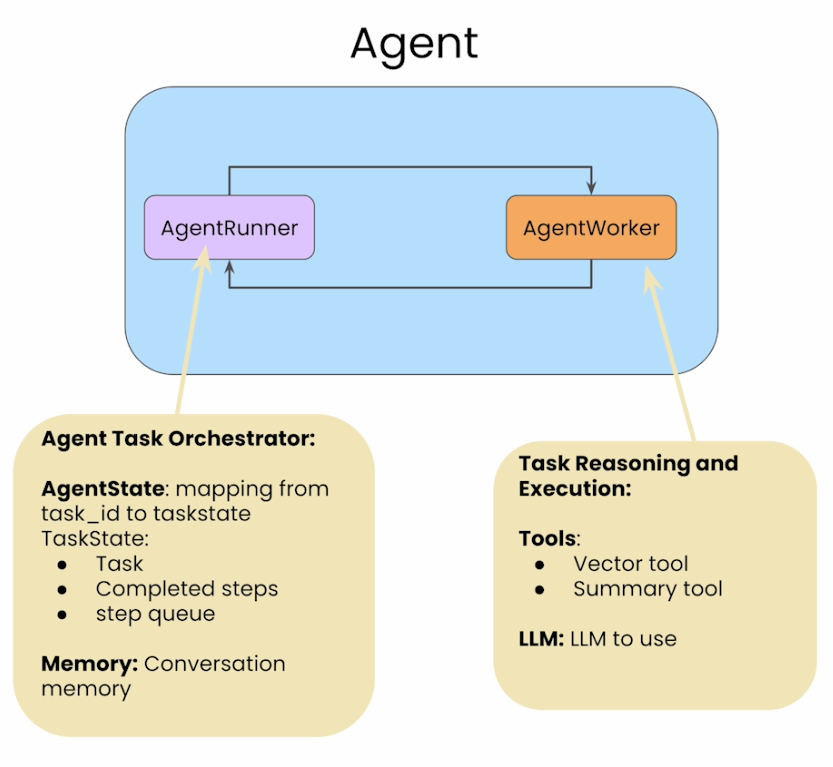

In [ ]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], llm=llm, verbose=True
)
agent = AgentRunner(agent_worker)

In [ ]:
response = agent.query(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)

Added user message to memory: Tell me about the agent roles in MetaGPT, and then how they communicate with each other.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "What are the agent roles in MetaGPT?"}
=== Function Output ===
The agent roles in MetaGPT are Product Manager, Architect, Project Manager, Engineer, and QA Engineer.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "How do agents communicate with each other in MetaGPT?"}
=== Function Output ===
Agents in MetaGPT communicate with each other through a shared message pool where they publish structured messages. They can also subscribe to relevant messages based on their profiles, allowing them to access necessary information without direct one-to-one communication. This publish-subscribe mechanism enhances communication efficiency by enabling agents to retrieve required information directly from the shared pool.
=== LLM Response ===
In MetaGPT, the agent

In [ ]:
print(response.source_nodes[0].get_content(metadata_mode="all"))

page_label: 16
file_name: metagpt.pdf
file_path: ../data/metagpt.pdf
file_type: application/pdf
file_size: 16911937
creation_date: 2025-01-02
last_modified_date: 2025-01-02

Preprint
and pay according to their usage. Moreover, users can purchase additional capabilities to expand the
plug-and-play functions of their existing agents. This allows users to gradually upgrade their agents.
Within the MetaGPT framework, AgentStore can support the collaboration of various agents. Users
can collect several agents together to carry out more complex tasks or projects, and all the agents
share and comply with development and communication protocols defined in MetaGPT.
Figure 6: AgentStore is a platform dedicated to serving users in the creation and development of
agents within the MetaGPT framework. This platform provides users with an operational interface,
allowing users to easily manage a variety of agents with different emotions, personalities, and capa-
bilities for specific tasks.
16


# memory

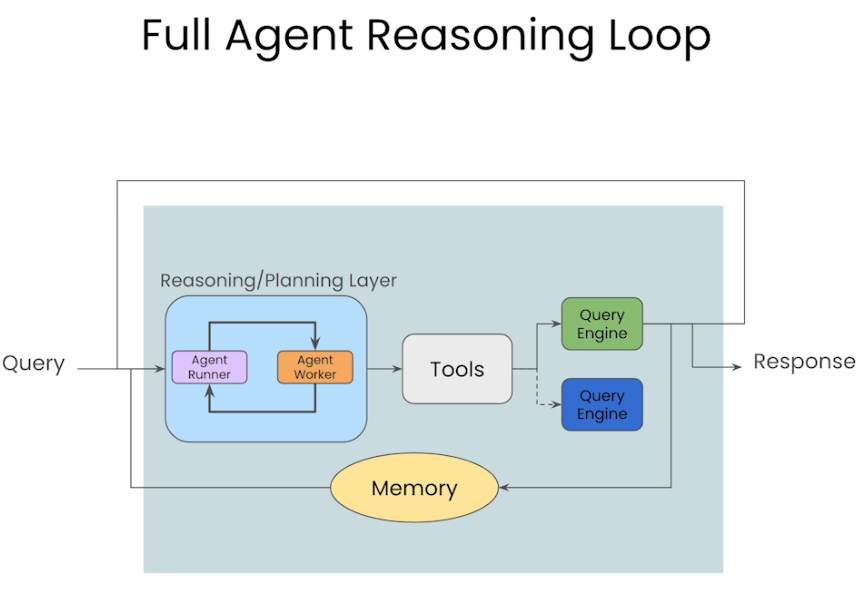

In [ ]:
response = agent.chat("Tell me about the evaluation datasets used.")

Added user message to memory: Tell me about the evaluation datasets used.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "What are the evaluation datasets used in MetaGPT?"}
=== Function Output ===
The evaluation datasets used in MetaGPT are HumanEval, MBPP, and SoftwareDev.
=== LLM Response ===
The evaluation datasets used in MetaGPT are:

1. **HumanEval**
2. **MBPP (Mostly Basic Python Problems)**
3. **SoftwareDev**


In [ ]:
response = agent.chat("Tell me the results over one of the above datasets.")

Added user message to memory: Tell me the results over one of the above datasets.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "What are the results of MetaGPT over the HumanEval dataset?"}
=== Function Output ===
MetaGPT achieves pass rates of 85.9% and 87.7% on the HumanEval dataset.
=== LLM Response ===
MetaGPT achieves pass rates of 85.9% and 87.7% on the HumanEval dataset.


# debuggability

In [ ]:
agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], llm=llm, verbose=True
)
agent = AgentRunner(agent_worker)

In [ ]:
task = agent.create_task(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)

In [ ]:
step_output = agent.run_step(task.task_id)

Added user message to memory: Tell me about the agent roles in MetaGPT, and then how they communicate with each other.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "agent roles in MetaGPT"}
=== Function Output ===
In MetaGPT, the defined agent roles include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. Each role has specific responsibilities and skills tailored to their tasks, contributing to the overall workflow and efficiency of the multi-agent system.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "how agents communicate with each other in MetaGPT"}
=== Function Output ===
Agents in MetaGPT communicate with each other through a shared message pool where they publish structured messages. They can also subscribe to relevant messages based on their profiles, allowing them to access necessary information without direct one-to-one communication. This system enhances communication efficie

In [ ]:
completed_steps = agent.get_completed_steps(task.task_id)
print(f"Num completed for task {task.task_id}: {len(completed_steps)}")
print(completed_steps[0].output.sources[0].raw_output)

Num completed for task f0d88692-1951-4488-8ada-932c153d5abe: 1
In MetaGPT, the defined agent roles include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. Each role has specific responsibilities and skills tailored to their tasks, contributing to the overall workflow and efficiency of the multi-agent system.


In [ ]:
upcoming_steps = agent.get_upcoming_steps(task.task_id)
print(f"Num upcoming steps for task {task.task_id}: {len(upcoming_steps)}")
upcoming_steps[0]

Num upcoming steps for task f0d88692-1951-4488-8ada-932c153d5abe: 1


TaskStep(task_id='f0d88692-1951-4488-8ada-932c153d5abe', step_id='c1bac5eb-e069-4222-bb61-5145502fdf7a', input=None, step_state={}, next_steps={}, prev_steps={}, is_ready=True)

In [ ]:
step_output = agent.run_step(
    task.task_id, input="What about how agents share information?"
)

Added user message to memory: What about how agents share information?
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "how agents share information in MetaGPT"}
=== Function Output ===
Agents in MetaGPT share information through a structured communication protocol that involves using a shared message pool. They publish structured messages to this pool and can subscribe to relevant messages based on their profiles. This system allows agents to obtain directional information from other roles and public information from the environment, facilitating efficient communication and collaboration.


In [ ]:
step_output = agent.run_step(task.task_id)
print(step_output.is_last)

=== LLM Response ===
In MetaGPT, agents share information through a structured communication protocol involving a shared message pool. They publish structured messages to this pool and subscribe to relevant messages based on their profiles. This approach allows agents to efficiently obtain directional information from other roles and public information from the environment, enhancing communication and collaboration.
True


In [ ]:
response = agent.finalize_response(task.task_id)

In [ ]:
print(str(response))

In MetaGPT, agents share information through a structured communication protocol involving a shared message pool. They publish structured messages to this pool and subscribe to relevant messages based on their profiles. This approach allows agents to efficiently obtain directional information from other roles and public information from the environment, enhancing communication and collaboration.
